In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline

In [2]:
climate_df = pd.read_csv('./data/GlobalTemperatures.csv')

In [5]:
climate_df.keys(), climate_df.head(), climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 9 columns):
date                                         3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 249.4+ KB


(Index([u'date', u'LandAverageTemperature',
        u'LandAverageTemperatureUncertainty', u'LandMaxTemperature',
        u'LandMaxTemperatureUncertainty', u'LandMinTemperature',
        u'LandMinTemperatureUncertainty', u'LandAndOceanAverageTemperature',
        u'LandAndOceanAverageTemperatureUncertainty'],
       dtype='object'),
          date  LandAverageTemperature  LandAverageTemperatureUncertainty  \
 0  1750-01-01                   3.034                              3.574   
 1  1750-02-01                   3.083                              3.702   
 2  1750-03-01                   5.626                              3.076   
 3  1750-04-01                   8.490                              2.451   
 4  1750-05-01                  11.573                              2.072   
 
    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
 0                 NaN                            NaN                 NaN   
 1                 NaN                          

In [20]:
climate_over1850_df = climate_df
climate_over1850_df = climate_over1850_df[climate_over1850_df['date']>='1850-01-01']

In [21]:
climate_over1850_df.date = pd.to_datetime(climate_over1850_df.date)

In [22]:
climate_over1850_df.date.head()

1200   1850-01-01 00:00:00
1201   1850-02-01 00:00:00
1202   1850-03-01 00:00:00
1203   1850-04-01 00:00:00
1204   1850-05-01 00:00:00
Name: date, dtype: datetime64[ns]

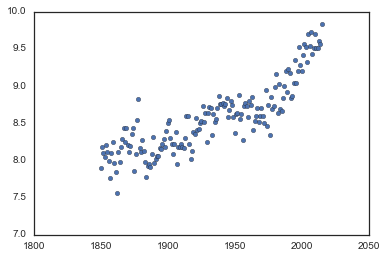

In [51]:
plt.scatter(climate_over1850_df.date.dt.year.unique(), climate_over1850_df.LandAverageTemperature.groupby(climate_over1850_df.date.dt.year).mean())

In [63]:
# climate_over1850_df.date.dt.year.unique()
# climate_over1850_df.LandAverageTemperature.groupby(climate_over1850_df.date.dt.year).mean()
# climate_over1850_df[climate_over1850_df['date'].dt.year >= 2000]
climate_over1850_df['year'] = climate_over1850_df['date'].dt.year
climate_over1850_df['month'] = climate_over1850_df['date'].dt.month

/Users/ccuulinay/.pyenv/versions/2.7.9/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ccuulinay/.pyenv/versions/2.7.9/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


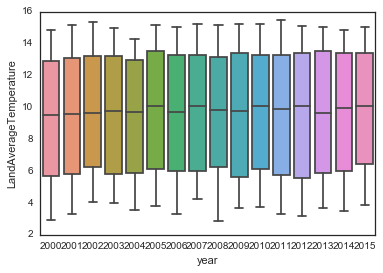

In [66]:
sns.boxplot(x="year",y="LandAverageTemperature", data=climate_over1850_df[climate_over1850_df['year'] >=2000])

In [131]:
X = np.array(climate_over1850_df[['year','month']])
y = np.array(climate_over1850_df['LandAverageTemperature'])

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(learning_rate=0.03, max_features=0.03, n_estimators=500)
clf.fit(X, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.03, loss='ls',
             max_depth=3, max_features=0.03, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [133]:
predict_X = []
start_year = 2016
for year in range(5):
	for month in range(12):
		predict_X.append([start_year+year, month+1])
# Predict temperature
predict_Y = clf.predict(predict_X)

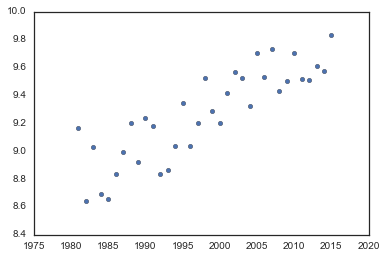

In [156]:
year_x = []
for x in X:
    year_x.append(x[0])
data = {}
for x, y in zip(year_x, y):
    if x not in data.keys():
        data[x] = y
    else:
        data[x] = (data[x] + y) 
for key, value in data.items():
    if key > 1980:
        plt.scatter(key, value/12)

plt.show()